# Revisiting King County Home Prices

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import set_config
set_config(display='diagram')

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys

In [18]:
## load data
url = 'https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project/main/data/kc_house_data.csv'
df = pd.read_csv(url,na_values='?')
df.drop(columns=['id','date'],inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [19]:
## Converting categorical cols to strings for easier preprocessing
make_cats = ['zipcode'] #'condition'
for col in make_cats:
    df[col] = df[col].astype(str)

In [20]:
## make x,y
target='price'

X = df.drop(columns=target).copy()
y = df[target].copy()

X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=321)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6433,3,1.75,1120,4000,1.0,0.0,0.0,4,7,870,250.0,1916,0.0,98107,47.6684,-122.368,1470,4000
12101,3,1.75,1580,6620,1.0,0.0,0.0,3,7,1580,0.0,1988,0.0,98003,47.2798,-122.303,1580,8137
15873,3,1.50,1790,7526,1.0,0.0,0.0,3,7,1790,0.0,1953,2014.0,98004,47.6387,-122.207,2080,10943
4661,3,2.50,1990,3984,2.0,0.0,0.0,3,8,1990,0.0,2004,0.0,98075,47.5914,-122.017,2320,3984
2357,4,2.50,2020,6236,2.0,0.0,0.0,3,7,2020,0.0,2002,NaN,98001,47.2796,-122.247,1940,5076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,2,1.00,940,7700,1.0,0.0,0.0,4,6,940,0.0,1916,NaN,98133,47.7067,-122.354,1290,7375
5929,3,2.50,2480,37843,1.5,NaN,3.0,4,8,2480,0.0,1974,NaN,98070,47.4003,-122.422,2350,42122
11039,3,1.75,1330,12618,1.0,0.0,3.0,3,7,1330,0.0,1983,NaN,98188,47.4403,-122.271,1870,8429
4220,3,1.75,1995,18360,2.0,0.0,0.0,3,7,1995,0.0,1957,0.0,98198,47.4129,-122.322,1980,13640


In [21]:
## Null Values
X_train.isna().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1799
view               43
condition           0
grade               0
sqft_above          0
sqft_basement     339
yr_built            0
yr_renovated     2872
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [22]:
## Defining list of columns for preprocessing approaches
zero_cols = ['view','sqft_basement','yr_renovated']
knn_cols = ['waterfront',]
cat_cols = df.select_dtypes('object').columns.to_list()#['zipcode']
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
df.drop(columns=[*zero_cols,*knn_cols,*cat_cols,*num_cols]).columns

Index(['price'], dtype='object')

In [23]:
# num_cols = list(X_train.select_dtypes('number').columns)
# cat_cols = list(X_train.select_dtypes('object').columns)
# num_cols,cat_cols

In [24]:
## PREPARING PIELINES FOR COLUMN TRANSFORMER

## save a scaler to instantiate for all
scaler_for_all = StandardScaler

zero_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',scaler_for_all())
])

knn_tf = Pipeline(steps=[
    ('imputer',KNNImputer()),
    ('scaler',scaler_for_all())])

cat_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

num_tf = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',scaler_for_all())
])

## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num_tf',num_tf,num_cols),
    ('zero_tf',zero_tf,zero_cols),
    ('knn_tf',knn_tf,knn_cols),
    ('cat_tf',cat_tf,cat_cols)
])


preprocessor

ColumnTransformer(transformers=[('num_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'condition', 'grade',
                                  'sqft_above', 'yr_built', 'lat', 'long',
                                  'sqft_living15', 'sqft_lot15']),
                                ('zero_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['view', 'sqft_basement', 'yr_renovated']),
                                ('knn_tf',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['waterfront']),
                                ('cat_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['zipcode'])])

In [25]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'condition', 'grade',
                                  'sqft_above', 'yr_built', 'lat', 'long',
                                  'sqft_living15', 'sqft_lot15']),
                                ('zero_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['view', 'sqft_basement', 'yr_renovated']),
                                ('knn_tf',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['waterfront']),
                                ('cat_tf',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['zipcode'])])

In [26]:
## get encoded feature names
cat_features = preprocessor.named_transformers_['cat_tf']\
                        .named_steps['encoder'].get_feature_names(cat_cols)
cat_features

array(['zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', '

In [28]:
## make list of final output columns
X_cols = [*num_cols,*zero_cols,*knn_cols,*cat_features]
X_cols[:10]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'lat']

In [29]:
## Transform X_train, X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)


## Tranform X_train and X_test and make into DataFrames
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6433,-0.402511,-0.479166,-1.044407,-0.266958,-0.917244,0.907485,-0.563361,-1.106775,-1.875431,0.781814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12101,-0.402511,-0.479166,-0.547215,-0.204171,-0.917244,-0.629858,-0.563361,-0.254565,0.574854,-2.019417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15873,-0.402511,-0.801723,-0.320235,-0.182459,-0.917244,-0.629858,-0.563361,-0.002503,-0.616257,0.567721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4661,-0.402511,0.488506,-0.104064,-0.267341,0.937512,-0.629858,0.288544,0.237556,1.119362,0.226758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.669418,0.488506,-0.071639,-0.213373,0.937512,-0.629858,-0.563361,0.273564,1.051299,-2.020859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,-1.474441,-1.446837,-1.238961,-0.178290,-0.917244,0.907485,-1.415265,-1.022754,-1.875431,1.057900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5929,-0.402511,0.488506,0.425554,0.544071,0.010134,0.907485,0.288544,0.825700,0.098410,-1.150790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11039,-0.402511,-0.479166,-0.817428,-0.060432,-0.917244,-0.629858,-0.563361,-0.554639,0.404696,-0.862449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4220,-0.402511,-0.479166,-0.098660,0.077172,0.937512,-0.629858,-0.563361,0.243557,-0.480130,-1.059963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Regression Neural Network

In [31]:
from tensorflow.random import set_seed
set_seed(321)

import tensorflow as tf
print(tf.__version__)

import numpy as np 
np.random.seed(321)

from tensorflow.keras import layers,optimizers,callbacks, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text,sequence
from sklearn.model_selection import train_test_split
from sklearn import metrics

2.4.0


In [32]:
X_train_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6433,-0.402511,-0.479166,-1.044407,-0.266958,-0.917244,0.907485,-0.563361,-1.106775,-1.875431,0.781814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12101,-0.402511,-0.479166,-0.547215,-0.204171,-0.917244,-0.629858,-0.563361,-0.254565,0.574854,-2.019417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15873,-0.402511,-0.801723,-0.320235,-0.182459,-0.917244,-0.629858,-0.563361,-0.002503,-0.616257,0.567721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4661,-0.402511,0.488506,-0.104064,-0.267341,0.937512,-0.629858,0.288544,0.237556,1.119362,0.226758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.669418,0.488506,-0.071639,-0.213373,0.937512,-0.629858,-0.563361,0.273564,1.051299,-2.020859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,-1.474441,-1.446837,-1.238961,-0.178290,-0.917244,0.907485,-1.415265,-1.022754,-1.875431,1.057900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5929,-0.402511,0.488506,0.425554,0.544071,0.010134,0.907485,0.288544,0.825700,0.098410,-1.150790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11039,-0.402511,-0.479166,-0.817428,-0.060432,-0.917244,-0.629858,-0.563361,-0.554639,0.404696,-0.862449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4220,-0.402511,-0.479166,-0.098660,0.077172,0.937512,-0.629858,-0.563361,0.243557,-0.480130,-1.059963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
def plot_history(history,model,figsize=(8,4)):
    """Takes a keras history and model and plots 
    all metrics in separate plots for each metric"""
#     print(header,'\t[i] MODEL HISTORY',header,sep='\n')

    ## Make a dataframe out of history
    res_df = pd.DataFrame(history.history)#.plot()

    ## Plot Losses
    plot_kws = dict(marker='o',ls=':',lw=2,figsize=figsize)

    ## Plot all metrics
    metrics_list = model.metrics_names

    for metric in metrics_list:
        ax = res_df[[col for col in res_df.columns if metric in col]].plot(**plot_kws)
        ax.set(xlabel='Epoch',ylabel=metric,title=metric)
        ax.grid()
        ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        plt.show()
        
        
        
def evaluate_scores(model,X_train,y_train,label='Training',verbose=0):
    """Evaluates a keras model and prints the scores using the provided label."""
    train_scores  = model.evaluate(X_train,y_train,verbose=verbose)#score()
    for i,metric in enumerate(model.metrics_names):
        print(f"\t{label} {metric}: {train_scores[i]:.3f}")

        
        
def evaluate_regression(model, X_test, y_test, history=None, 
                        X_train = None, y_train = None,
                        history_figsize = (8,4) ):

    header =  '==='*24
    
    ## First, Plot History, if provided.
    if history is not None:
        print(header,'\t[i] MODEL HISTORY',header,sep='\n')
        plot_history(history,model,figsize=history_figsize)
        
    ## Evaluate Network for loss/acc scores
    print(header,"\t[i] EVALUATING MODEL",header,sep='\n')
    print()
    
    if X_train is not None:
        try:
            evaluate_scores(model,X_train,y_train,label='Training')
            print()

        except Exception as e:
            print("Error evaluating for accuracy for training data:")
            print(e)
        
#     finally:
    ## Evaluate test data
    evaluate_scores(model,X_test,y_test,label='Test')
    print("\n")
    sklearn_metrics(model,X_test,y_test)
    
    
    
def sklearn_metrics(model, X_test_df,y_test):
    # R-squared 
    y_hat_test = model.predict(X_test_df)
    print(f"R2 for Test Data: {metrics.r2_score(y_test,y_hat_test):.2f}")
    print(f"RMSE Test Data: {metrics.mean_squared_error(y_test,y_hat_test,squared=False):.2f}")

In [18]:
#https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
from tensorflow.keras import backend as K

def r_squared(y_true,y_pred):
    """Calculates r-squaared using Keras backend 
    Source: https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
    """
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Making our neural network

In [19]:

def make_model():
    model=models.Sequential()

    model.add(layers.Dense(100,activation='relu',#layers.LeakyReLU(),#'relu',
                           input_shape=(X_train_df.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.1),
        loss='mean_absolute_error',
        metrics=[r_squared])#tfa.metrics.r_square.RSquare()])
    display(model.summary())
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8800      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 8,901
Trainable params: 8,901
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/100
405/405 [==============================] - 1s 2ms/step - loss: 449240.0059 - r_squared: -2.4025 - val_loss: 164025.8906 - val_r_squared: 0.3208
Epoch 2/100
405/405 [==============================] - 0s 949us/step - loss: 166671.6503 - r_squared: 0.3440 - val_loss: 129565.9062 - val_r_squared: 0.5102
Epoch 3/100
405/405 [==============================] - 0s 842us/step - loss: 132542.8424 - r_squared: 0.5344 - val_loss: 109478.2109 - val_r_squared: 0.6447
Epoch 4/100
405/405 [==============================] - 0s 840us/step - loss: 113630.0620 - r_squared: 0.6385 - val_loss: 101022.6953 - val_r_squared: 0.6998
Epoch 5/100
405/405 [==============================] - 0s 784us/step - loss: 105240.7238 - r_squared: 0.7030 - val_loss: 96455.8594 - val_r_squared: 0.7266
Epoch 6/100
405/405 [==============================] - 0s 873us/step - loss: 103884.2475 - r_squared: 0.7208 - val_loss: 95009.4453 - val_r_squared: 0.7460
Epoch 7/100
405/405 [==============================] - 0s 780

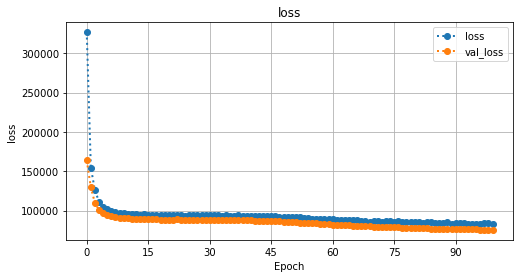

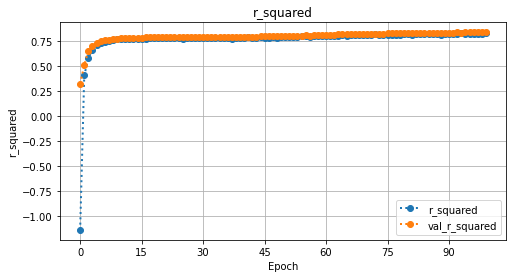

	[i] EVALUATING MODEL

	Training loss: 75626.297
	Training r_squared: 0.847

	Test loss: 75055.922
	Test r_squared: 0.843


R2 for Test Data: 0.85
RMSE Test Data: 129346.53


In [20]:
model = make_model()

early_stop = callbacks.EarlyStopping(verbose=1,patience=5,restore_best_weights=True)

history = model.fit(X_train_df,y_train,batch_size=32,
                    epochs=100, validation_split=0.2,
                   callbacks=early_stop)

evaluate_regression(model,X_test_df,y_test, history=history,
                    X_train=X_train_df,y_train=y_train)

### Making a Deeper Network

In [21]:

def make_deep_model():
    model=models.Sequential()

    model.add(layers.Dense(200,activation='relu',#layers.LeakyReLU(),#'relu',
                           input_shape=(X_train_df.shape[1],)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(50,activation='relu'))#layers.LeakyReLU()))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss='mean_absolute_error',
        metrics=[r_squared])#tfa.metrics.r_square.RSquare()])
    display(model.summary())
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               17600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,701
Trainable params: 27,701
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/100
810/810 [==============================] - 1s 1ms/step - loss: 325974.0196 - r_squared: -1.6198 - val_loss: 108840.6406 - val_r_squared: 0.6655
Epoch 2/100
810/810 [==============================] - 1s 972us/step - loss: 116484.8370 - r_squared: 0.6665 - val_loss: 94441.7969 - val_r_squared: 0.7389
Epoch 3/100
810/810 [==============================] - 1s 911us/step - loss: 107031.3719 - r_squared: 0.7049 - val_loss: 90958.5000 - val_r_squared: 0.7586
Epoch 4/100
810/810 [==============================] - 1s 900us/step - loss: 102493.5742 - r_squared: 0.7161 - val_loss: 88983.5156 - val_r_squared: 0.7678
Epoch 5/100
810/810 [==============================] - 1s 812us/step - loss: 100166.3064 - r_squared: 0.7385 - val_loss: 86904.8984 - val_r_squared: 0.7760
Epoch 6/100
810/810 [==============================] - 1s 900us/step - loss: 100143.0835 - r_squared: 0.7340 - val_loss: 85705.6016 - val_r_squared: 0.7807
Epoch 7/100
810/810 [==============================] - 1s 1ms/st

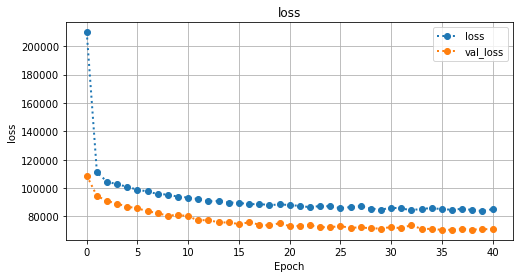

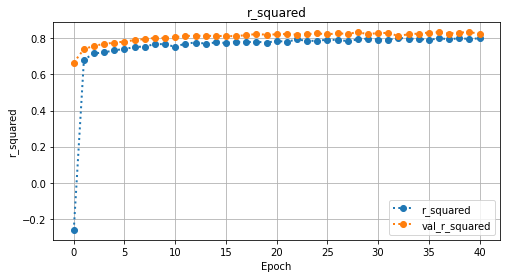

	[i] EVALUATING MODEL

	Training loss: 69792.578
	Training r_squared: 0.868

	Test loss: 70613.844
	Test r_squared: 0.858


R2 for Test Data: 0.88
RMSE Test Data: 117328.66


In [22]:
early_stop = callbacks.EarlyStopping(verbose=1,patience=5,restore_best_weights=True)

deep_model = make_deep_model()

history = deep_model.fit(X_train_df,y_train,batch_size=16,
                    epochs=100, validation_split=0.2,
                   callbacks=early_stop)

evaluate_regression(deep_model,X_test_df,y_test, history=history,
                    X_train=X_train_df,y_train=y_train)

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


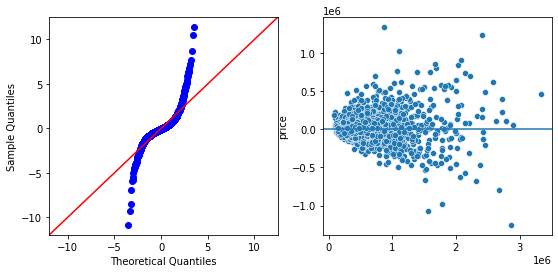

In [29]:
import statsmodels.api as sm

y_hat_test = deep_model.predict(X_test_df).flatten()
resid = y_test - y_hat_test#.flatten()


fig,ax = plt.subplots(figsize=(9,4),ncols=2)
sm.graphics.qqplot(resid,fit=True,line='45',ax=ax[0]);
sns.scatterplot(y_hat_test,resid,ax=ax[1])
ax[1].axhline()

In [24]:
# import os
# %load_ext tensorboard
# logdir = './logs/'
# os.makedirs(logdir,exist_ok=True)
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [25]:
# model = make_model()
# history = model.fit(X_train_df,y_train,epochs=25,
#                     validation_split=0.2,
#                     callbacks=[tensorboard_callback])
# evaluate_regression(model,X_test_df,y_test, X_train=X_train_df,y_train=y_train)

In [26]:
# %tensorboard --logdir logs

### Feature Importance

In [27]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test_df, y_test, n_repeats=10,
                           random_state=0,scoring='r2')
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

<AxesSubplot:>

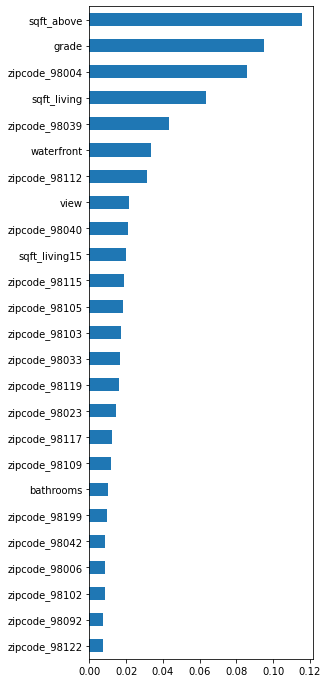

In [28]:
importances = pd.Series(r.importances_mean,index=X_cols)#,index=
importances.sort_values().tail(25).plot(kind='barh',figsize=(4,12))